# Download data

This notebook is for download granular data from Brazil, which is amazingly organized and available here
https://data.brasil.io/dataset/covid19/_meta/list.html
by BRASIL.IO people (thank you!).

In [24]:
import subprocess
import gzip
import pandas as pd
import os

In [25]:
url = 'https://data.brasil.io/dataset/covid19/caso_full.csv.gz'
file = 'caso_full.csv.gz'
path = '/home/babreu/Science/covid19/repo'
os.chdir(path)
subprocess.run(['wget', '-c','-P', path, url])

CompletedProcess(args=['wget', '-c', '-P', '/home/babreu/Science/covid19/repo', 'https://data.brasil.io/dataset/covid19/caso_full.csv.gz'], returncode=0)

In [26]:
with gzip.open(file) as f:
    df = pd.read_csv(f)

In [46]:
# check state-wise distribution
df2 = df[df.is_last == True]
df2.groupby(['state']).sum()

city_ibge_code  estimated_population_2019  is_repeated  is_last  \
state                                                                    
AC          6001744.0                   471106.0          0.0      5.0   
AL         10822820.0                  1164133.0          0.0      5.0   
AM         26053899.0                  3108077.0          0.0     21.0   
AP          4801404.0                   651961.0          0.0      3.0   
BA        209967679.0                  7800589.0          0.0     73.0   
CE        131506862.0                  6313150.0          0.0     58.0   
DF          5300108.0                  3015268.0          0.0      1.0   
ES         86484005.0                  3070804.0          0.0     28.0   
GO        198044329.0                  4489654.0          0.0     39.0   
MA         48469365.0                  2666905.0          0.0     23.0   
MG        313659310.0                 11778028.0          0.0    101.0   
MS         70071186.0                  1734255.0          0.0     14.0   
MT         91895904.0                  1832619.0          0.0     19.0   
PA         34586519.0                  4272768.0          0.0     23.0   
PB         27598457.0                  1776588.0          0.0     11.0   
PE        135629012.0                  6470794.0          0.0     53.0   
PI         11039267.0                  1098893.0          0.0      5.0   
PR        329134419.0                  8011323.0          0.0     81.0   
RJ        204802508.0                 16722248.0          0.0     63.0   
RN         69785624.0                  2213865.0          0.0     30.0   
RO          7701211.0                  1009098.0          0.0      7.0   
RR          7000940.0                   462868.0          0.0      5.0   
RS        353572642.0                  7766642.0          0.0     82.0   
SC        341006511.0                  5141397.0          0.0     82.0   
SE         19626742.0                   908115.0          0.0      7.0   
SP        578561448.0                 38582039.0          0.0    165.0   
TO         10259594.0                   644017.0          0.0      6.0   

       last_available_confirmed  \
state                             
AC                           77   
AL                           48   
AM                         1206   
AP                          237   
BA                          674   
CE                         1748   
DF                          618   
ES                          430   
GO                          229   
MA                          445   
MG                          815   
MS                          101   
MT                          123   
PA                          259   
PB                          111   
PE                          960   
PI                           51   
PR                          769   
RJ                         2855   
RN                          339   
RO                           42   
RR                           83   
RS                          664   
SC                          776   
SE                           44   
SP                         8755   
TO                           26   

       last_available_confirmed_per_100k_inhabitants  \
state                                                  
AC                                         120.72594   
AL                                          13.83402   
AM                                         292.75057   
AP                                          73.40737   
BA                                         619.48038   
CE                                         385.14182   
DF                                          20.49569   
ES                                         227.10927   
GO                                         397.78365   
MA                                         146.21660   
MG                                         819.95243   
MS                                         170.24327   
MT                                         125.21961   
PA  

<IPython.core.display.Javascript object>


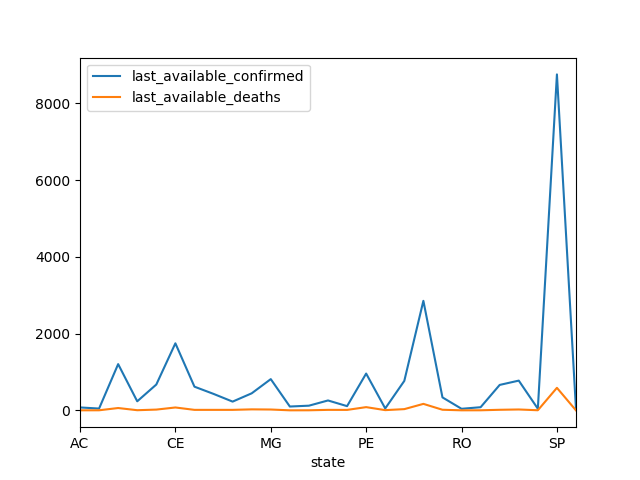

In [47]:
# plot it -- geographical maps on /basics/basics.ipynb
%matplotlib notebook
df2.groupby(['state']).sum()[['last_available_confirmed','last_available_deaths']].plot()

In [48]:
df2[df2.city.str.contains('Rio Preto')]

city  city_ibge_code        date  \
11500  São Benedito do Rio Preto       2110401.0  2020-04-12   
12231      São José do Rio Preto       3549805.0  2020-04-12   

       estimated_population_2019  is_repeated  is_last  \
11500                    18663.0        False     True   
12231                   460671.0        False     True   

       last_available_confirmed  \
11500                         1   
12231                        44   

       last_available_confirmed_per_100k_inhabitants last_available_date  \
11500                                        5.35820          2020-04-12   
12231                                        9.55128          2020-04-12   

       last_available_death_rate  last_available_deaths place_type state  \
11500                        NaN                    0.0       city    MA   
12231                     0.0227                    1.0       city    SP   

       new_confirmed  new_deaths  
11500              0           0  
12231              4           0